# English Premier League(2020-21)
**Statistics of EPL 2020-21 season Players**<br><br>

Dataset Author: Rajat Chaudhari<br>
Dataset Source: https://www.kaggle.com/rajatrc1705/english-premier-league202021<br><br>

### Context:
This dataset is a collection of basic but crucial stats of the English Premier League 2020-21 season. The dataset has all the players that played in the EPL and their standard stats such as Goals, Assists, xG, xA, Passes Attempted, Pass Accuracy and more! Do upvote if you like it!

### Content:
**Position:**	Each player has a certain position, in which he plays regularly. The position in this dataset are, FW - Forward, MF - Midfield, DF - Defensive, GK - Goalkeeper<br>
**Starts:**	The number of times the player was named in the starting 11 by the manager.<br>
**Mins:**	The number of minutes played by the player.<br>
**Goals:**	The number of Goals scored by the player.<br>
**Assists:**	The number of times the player has assisted other player in scoring the goal.<br>
**Passes_Attempted:**	The number of passes attempted by the player.<br>
**PercPassesCompleted:**	The number of passes that the player accurately passed to his teammate.<br>
**xG:**	Expected number of goals from the player in a match.<br>
**xA:**	Expected number of assists from the player in a match.<br>
**Yellow_Cards:**	The players get a yellow card from the referee for indiscipline, technical fouls, or other minor fouls.<br>
**Red Cards:**	The players get a red card for accumulating 2 yellow cards in a single game, or for a major foul.<br>

### Objectives:

1. Find out which team has the most aggressive players: red + yellow cards
1. Which nation had the most aggressive players?
1. Which team had more players in the top 10 most assists
1. Who were the players with most attempted passes
1. Which players had the most accurate passes: all players and players by position
1. Top 10 goal scorers: all players and players by position 
1. Top 10 assists: all players and players by position 
1. Top 10 Players due to Ages
1. Show all teams with average age
1. Nationalities of the League
1. Correlation Graph

atasaygin points (https://www.kaggle.com/atasaygin/premier-league-player-analysis)


In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
# import squarify # pip install squarify

In [3]:
df = pd.read_csv('EPL_20_21.zip')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

We have 18 columns and 532 records without null values

### Find out which team has the most aggressive players.
Red and yellow cards

In [5]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

In [6]:
df_1 = df[['Club','Yellow_Cards','Red_Cards']].groupby('Club').sum().sort_values(by=['Red_Cards','Yellow_Cards'],ascending=False)

In [7]:
df_1.head()

,Yellow_Cards,Red_Cards
Club,,
Brighton,49,6
Arsenal,49,5
Aston Villa,71,4
West Bromwich Albion,51,4
Sheffield United,73,3


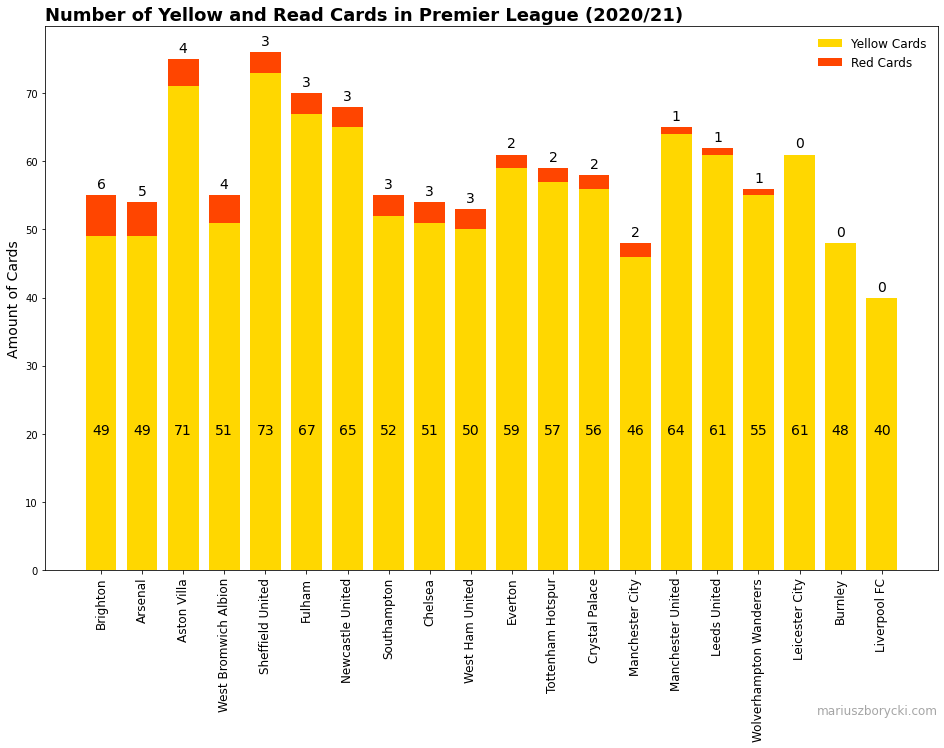

In [277]:
countries = df_1.index.tolist()
red_cards = df_1['Red_Cards'].tolist()
yellow_cards = df_1['Yellow_Cards'].tolist()
width = 0.75

fig, ax = plt.subplots(figsize=(16, 10))

ax.bar(countries, yellow_cards, width, label='Yellow Cards', color='gold')
ax.bar(countries, red_cards, width, bottom=yellow_cards, label='Red Cards', color='orangered')

ax.set_ylabel('Amount of Cards', fontsize=14)
ax.set_title('Number of Yellow and Read Cards in Premier League (2020/21)', loc ='left', fontsize=18, fontweight ='bold')
plt.xticks(countries, rotation=90, fontsize=12)

for index, data in enumerate(red_cards):
    plt.text(x=index , y=data + yellow_cards[index] + 1 , s=f"{data}" , fontdict=dict(fontsize=14), horizontalalignment='center')

for index, data in enumerate(yellow_cards):
    plt.text(x=index , y=20 , s=f"{data}" , fontdict=dict(fontsize=14), horizontalalignment='center')
    
ax.legend(fontsize=12, frameon=False)

fig.text(0.9, -0.08, 'mariuszborycki.com', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.show()

I have sorted the chart descending for red cards. Brighton had the biggest amount of red cards in Premier League. However, Sheffield United had the biggest amount of yellow cards and 4 red card what gave the highest total number of cards. 

---
All red cards by player:

In [9]:
df.loc[df.Red_Cards>0,['Name','Club','Yellow_Cards','Red_Cards']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Red_Cards','Yellow_Cards'],ascending=False)

,Name,Club,Yellow_Cards,Red_Cards
27,Lewis Dunk,Brighton,5,2
11,Douglas Luiz,Aston Villa,10,1
22,John Lundstram,Sheffield United,8,1
30,Luka Milivojević,Crystal Palace,8,1
33,Matty Cash,Aston Villa,8,1
45,Yves Bissouma,Brighton,8,1
15,Granit Xhaka,Arsenal,7,1
20,Joachim Andersen,Fulham,7,1
21,John Egan,Sheffield United,7,1
43,Tomáš Souček,West Ham United,7,1


Player names and club they played with cards they got

In [10]:
cards_per_min = df[['Name','Club','Yellow_Cards','Red_Cards','Mins']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Red_Cards','Yellow_Cards'],ascending=False)
cards_per_min['Total_Cards'] = cards_per_min.Yellow_Cards + cards_per_min.Red_Cards
cards_per_min['Mins_Card'] = round(cards_per_min.Mins / cards_per_min.Total_Cards)
cards_per_min.head(15).sort_values(by='Mins_Card',ascending=True)

,Name,Club,Yellow_Cards,Red_Cards,Mins,Total_Cards,Mins_Card
529,Érik Lamela,Tottenham Hotspur,6,1,717,7,102.0
253,John Lundstram,Sheffield United,8,1,2032,9,226.0
133,Douglas Luiz,Aston Villa,10,1,2781,11,253.0
314,Luka Milivojević,Crystal Palace,8,1,2359,9,262.0
346,Matty Cash,Aston Villa,8,1,2372,9,264.0
179,Granit Xhaka,Arsenal,7,1,2522,8,315.0
97,Craig Dawson,West Ham United,5,1,1925,6,321.0
251,John Egan,Sheffield United,7,1,2629,8,329.0
242,Joachim Andersen,Fulham,7,1,2730,8,341.0
526,Yves Bissouma,Brighton,8,1,3111,9,346.0


Lamela got a card in every 102 minute

In [11]:
df_2 = df[['Name','Nationality','Yellow_Cards','Red_Cards']].groupby('Nationality').agg({'Yellow_Cards':'sum','Red_Cards':'sum','Name':'count'}).sort_values(by=['Yellow_Cards','Red_Cards'],ascending=False).head(15)
df_2.rename(columns={'Name':'#_Players'},inplace=True)
df_2

,Yellow_Cards,Red_Cards,#_Players
Nationality,,,
ENG,402,13,192
BRA,70,6,27
ESP,63,1,26
POR,59,2,21
FRA,57,3,31
SCO,51,2,20
IRL,40,3,21
NED,30,0,16
NIR,24,0,5


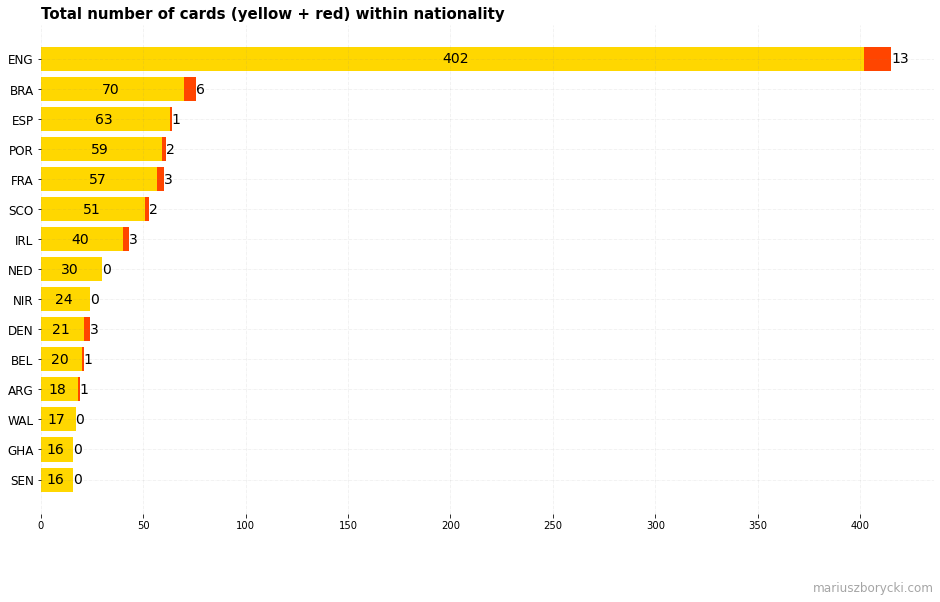

In [276]:
countries = df_2.index
red_cards = df_2['Red_Cards']
yellow_cards = df_2['Yellow_Cards']

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(countries, yellow_cards, color='gold')
ax.barh(countries, red_cards, left=yellow_cards, color='orangered')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
x_red = red_cards.tolist()
y_yellow = yellow_cards.tolist()

for index, data in enumerate(x_red):
    plt.text(x=data + y_yellow[index], y=index , s=f"{data}" , fontdict=dict(fontsize=14), verticalalignment='center')

for index, data in enumerate(y_yellow):
    plt.text(x=data /2 - 5, y=index, s=f"{data}" , fontdict=dict(fontsize=14), verticalalignment='center')
    
ax.set_title('Total number of cards (yellow + red) within nationality',
             loc ='left', size=15, fontweight ='bold' )
 
fig.text(0.9, 0, 'mariuszborycki.com', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.yticks(fontsize=12)
plt.show()

As we can see above majority of cards come from English players. But lets check how many players do we have per each nationality and then check the result taking the number into consideration

In [13]:
cards_per_nation = df[['Name','Nationality','Yellow_Cards','Red_Cards']].groupby('Nationality').agg({'Yellow_Cards':'sum','Red_Cards':'sum','Name':'count'})
cards_per_nation['Total_Cards'] = cards_per_nation.Yellow_Cards + cards_per_nation.Red_Cards
cards_per_nation.rename(columns={'Name':'#_Players'},inplace=True)
cards_per_nation['Cards_per_Player'] = cards_per_nation['Total_Cards'] / cards_per_nation['#_Players']
cards_per_nation = cards_per_nation.sort_values(by=['Cards_per_Player','#_Players'],ascending=False).reset_index().head(25)

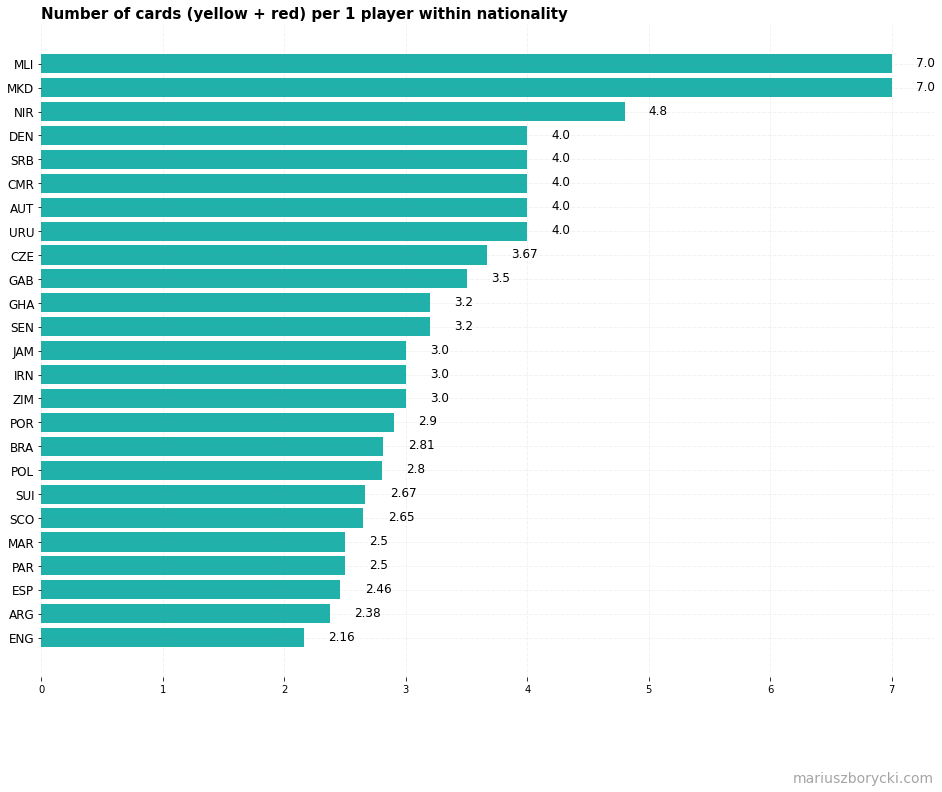

In [290]:
countries = cards_per_nation['Nationality']
cards = cards_per_nation['Cards_per_Player']
 
fig, ax = plt.subplots(figsize =(16, 12))
ax.barh(countries, cards, color='lightseagreen')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
ax.invert_yaxis()
 
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='black') # fontweight ='bold',

ax.set_title('Number of cards (yellow + red) per 1 player within nationality',
             loc ='left', size=15, fontweight ='bold' )
 
fig.text(0.9, 0, 'mariuszborycki.com', fontsize = 14,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.yticks(fontsize=12)
plt.show()

In [15]:
df[df.Nationality=='MLI']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
379,Moussa Djenepo,Southampton,MLI,MF,22,27,15,1240,1,0,400,73.8,0,0,0.07,0.04,5,0
396,Yves Bissouma,Brighton,MLI,MF,23,36,35,3111,1,0,1676,87.2,0,0,0.04,0.03,8,1


In [16]:
df[df.Nationality=='MKD']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
217,Ezgjan Alioski,Leeds United,MKD,DF,28,36,29,2461,2,3,1630,80.1,0,0,0.05,0.11,7,0


Now we can see that English players are on 25th place. On the first place we have footballers from Mali and from North Macedonia. In case of Mali we have 2 players Moussa Djenepo from Southampton and Yves Bissouma from Brighton and the got together 14 cards like 1 footballer from North Macedonia Ezgjan Alioski	who also got 14 cards but he did it by self.

---

In [17]:
df.Position.unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [18]:
# Assumption: first position is valid
old_pos = ['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF', 'MF,DF', 'DF,FW']
new_pos = ['Midfielder', 'Goalkeeper', 'Forward', 'Defender', 'Midfielder', 'Forward', 'Forward', 'Defender', 'Midfielder', 'Defender']

for pos1, pos2 in zip(old_pos,new_pos):
    df.Position.replace(pos1, pos2, inplace=True)

In [19]:
cards_per_position = df[['Name','Position','Yellow_Cards','Red_Cards']].groupby('Position').agg({'Yellow_Cards':'sum','Red_Cards':'sum','Name':'count'}).reset_index()
cards_per_position['Total_Cards'] = cards_per_position.Yellow_Cards + cards_per_position.Red_Cards
cards_per_position.rename(columns={'Name':'#_Players'},inplace=True)
cards_per_position['Cards_per_Position'] = cards_per_position['Total_Cards'] / cards_per_position['#_Players']
cards_per_position = cards_per_position.reset_index(drop=True).sort_values(by=['Cards_per_Position','#_Players'],ascending=False)
cards_per_position

,Position,Yellow_Cards,Red_Cards,#_Players,Total_Cards,Cards_per_Position
3,Midfielder,432,11,157,443,2.821656
0,Defender,488,27,199,515,2.587940
1,Forward,174,9,134,183,1.365672
2,Goalkeeper,31,1,42,32,0.761905


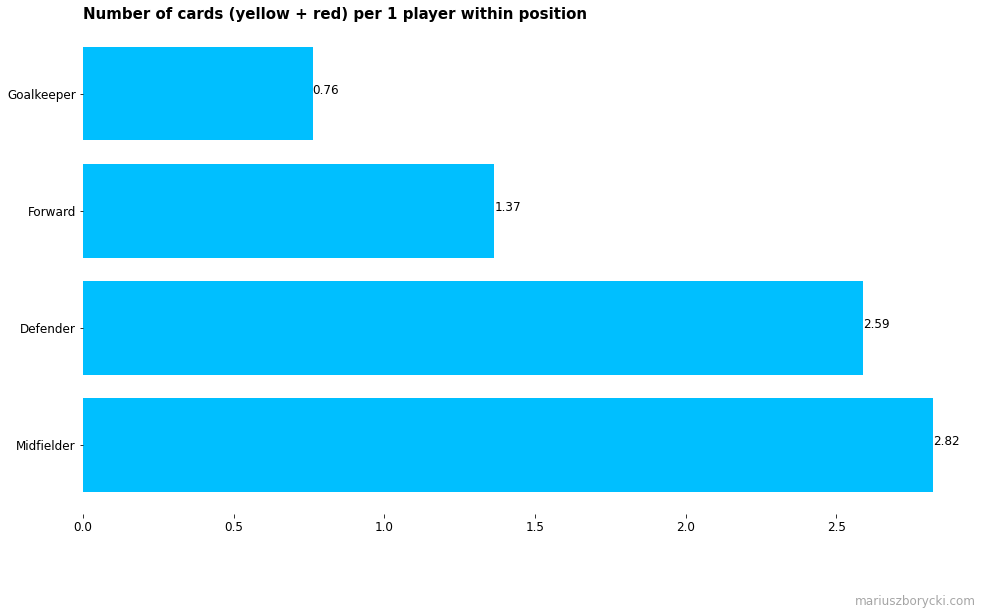

In [271]:
positions = cards_per_position['Position']
cards = cards_per_position['Cards_per_Position']
 
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(positions, cards, color='deepskyblue')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.4,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='black') # fontweight ='bold',

ax.set_title('Number of cards (yellow + red) per 1 player within position',
             loc ='left', size=15, fontweight ='bold' )
 
fig.text(0.9, -0.02, 'mariuszborycki.com', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

What might be interesting, midfielders have more cards per player than defenders. 

---

Below there are goals analysis (without own goals)

In [21]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

In [196]:
df_goals = df[['Club','Matches','Goals','Assists','xG','xA']].groupby('Club').\
agg({'Matches':'sum','Goals':'sum','Assists':'sum','xG':'mean','xA':'mean'}).reset_index()
df_goals['canadian'] = df_goals.Goals + df_goals.Assists
df_goals = df_goals.sort_values(by=['canadian'],ascending=False)

df_goals['xGoals'] = round(df_goals.xG * df_goals.Matches).astype(int)
df_goals['xAssists'] = round(df_goals.xA * df_goals.Matches).astype(int)

df_goals = df_goals.drop(['canadian','xG','xA','Matches'],axis=1)
df_goals

,Club,Goals,Assists,xGoals,xAssists
11,Manchester City,82,55,80,52
12,Manchester United,70,51,56,45
16,Tottenham Hotspur,66,50,68,40
9,Leicester City,64,45,64,42
10,Liverpool FC,65,43,72,51
18,West Ham United,60,46,59,45
8,Leeds United,60,45,61,46
4,Chelsea,56,38,72,45
0,Arsenal,53,38,67,44
1,Aston Villa,52,38,70,43


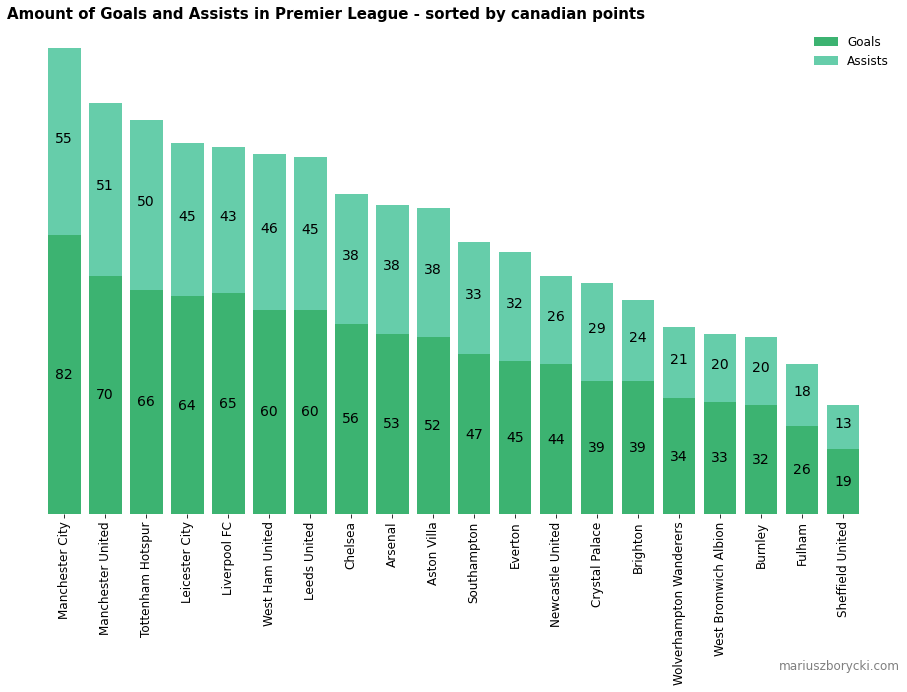

In [267]:
goals = df_goals['Goals']
assists = df_goals['Assists']
clubs = df_goals['Club']
 
fig, ax = plt.subplots(figsize =(16, 9))
ax.bar(clubs, goals, label="Goals", color='mediumseagreen')
ax.bar(clubs, assists, bottom=goals, label="Assists", color='mediumaquamarine')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

x_goals = goals.tolist()
x_assists = assists.tolist()

for ia, da in enumerate(x_assists):
    plt.text(x=ia, y=da / 2 + x_goals[ia] + 1, s=f"{da}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')

for ig, dg in enumerate(x_goals):
    plt.text(x=ig, y=dg / 2, s=f"{dg}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')

ax.set_title('Amount of Goals and Assists in Premier League - sorted by canadian points',
             loc ='left', size=15, fontweight ='bold')

fig.text(0.9, -0.1, 'mariuszborycki.com', fontsize = 12,
         color ='black', ha ='right', va ='top',
         alpha = 0.5)

ax.legend(fontsize=12, frameon=False)

plt.tick_params(left = False, right = False, labelleft = False, labelbottom = True, bottom = True)
plt.xticks(clubs,rotation=90,fontsize=12)

plt.show()

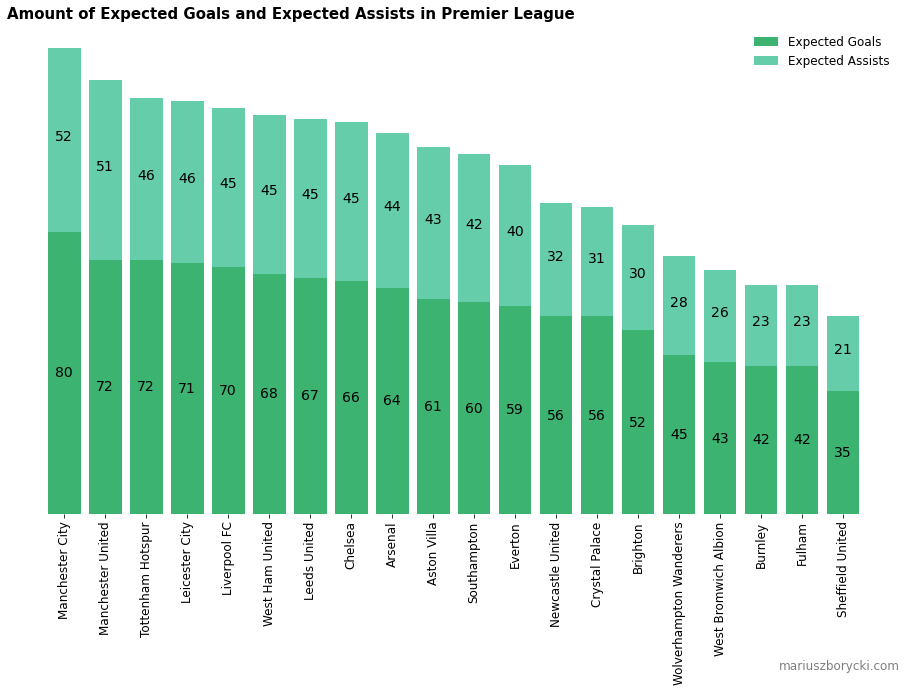

In [268]:
x_goals = df_goals['xGoals'].sort_values(ascending=False)
x_assists = df_goals['xAssists'].sort_values(ascending=False)
clubs = df_goals['Club']
 
fig, ax = plt.subplots(figsize =(16, 9))
ax.bar(clubs, x_goals, label="Expected Goals", color='mediumseagreen')
ax.bar(clubs, x_assists, bottom=x_goals, label="Expected Assists", color='mediumaquamarine')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

xx_goals = x_goals.tolist()
xx_assists = x_assists.tolist()

for ia, da in enumerate(xx_assists):
    plt.text(x=ia, y=da / 2 + xx_goals[ia] + 1, s=f"{da}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')

for ig, dg in enumerate(xx_goals):
    plt.text(x=ig, y=dg / 2, s=f"{dg}", fontdict=dict(fontsize=14), horizontalalignment='center', verticalalignment='center')


ax.set_title('Amount of Expected Goals and Expected Assists in Premier League',
             loc ='left', size=15, fontweight ='bold')

fig.text(0.9, -0.1, 'mariuszborycki.com', fontsize = 12,
         color ='black', ha ='right', va ='top',
         alpha = 0.5)

ax.legend(fontsize=12, frameon=False)

plt.tick_params(left = False, right = False, labelleft = False, labelbottom = True, bottom = True)
plt.xticks(clubs,rotation=90,fontsize=12)

plt.show()

In [170]:
df_canadian = df[['Name', 'Club', 'Position','Goals', 'Assists']].copy()
df_canadian['Cacadian_Points'] = df_canadian.Goals + df_canadian.Assists
df_canadian = df_canadian[['Name','Club','Cacadian_Points','Goals', 'Assists']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Cacadian_Points'],ascending=False).head(10)
df_canadian

,Name,Club,Cacadian_Points,Goals,Assists
186,Harry Kane,Tottenham Hotspur,37,23,14
71,Bruno Fernandes,Manchester United,30,18,12
471,Son Heung-min,Tottenham Hotspur,27,17,10
359,Mohamed Salah,Liverpool FC,27,22,5
226,Jamie Vardy,Leicester City,24,15,9
403,Patrick Bamford,Leeds United,24,17,7
323,Marcus Rashford,Manchester United,20,11,9
393,Ollie Watkins,Aston Villa,19,14,5
452,Sadio Mané,Liverpool FC,18,11,7
290,Kevin De Bruyne,Manchester City,18,6,12


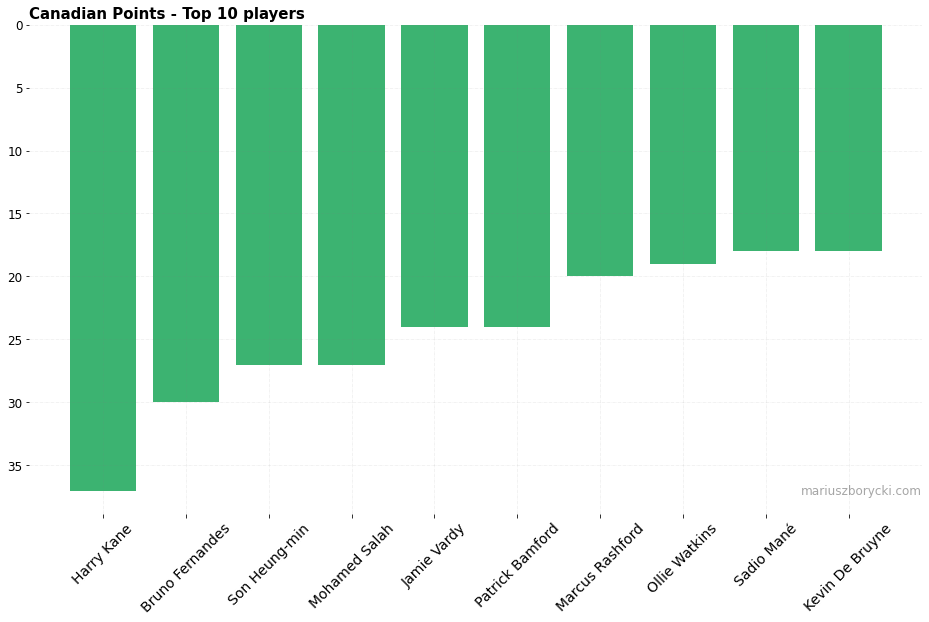

In [171]:
name = df_canadian['Name']
points = df_canadian['Cacadian_Points']
 
fig, ax = plt.subplots(figsize =(16, 9))
ax.bar(name, points, color='mediumseagreen')
 
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
ax.invert_yaxis()
 
ax.set_title('Canadian Points - Top 10 players',
             loc ='left', size=15, fontweight ='bold')
 
fig.text(0.9, 0.15, 'mariuszborycki.com', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.xticks(name,rotation=45,fontsize=14)
plt.yticks(fontsize=12)

plt.show()

**Which team had more players in the top 10 most assists**

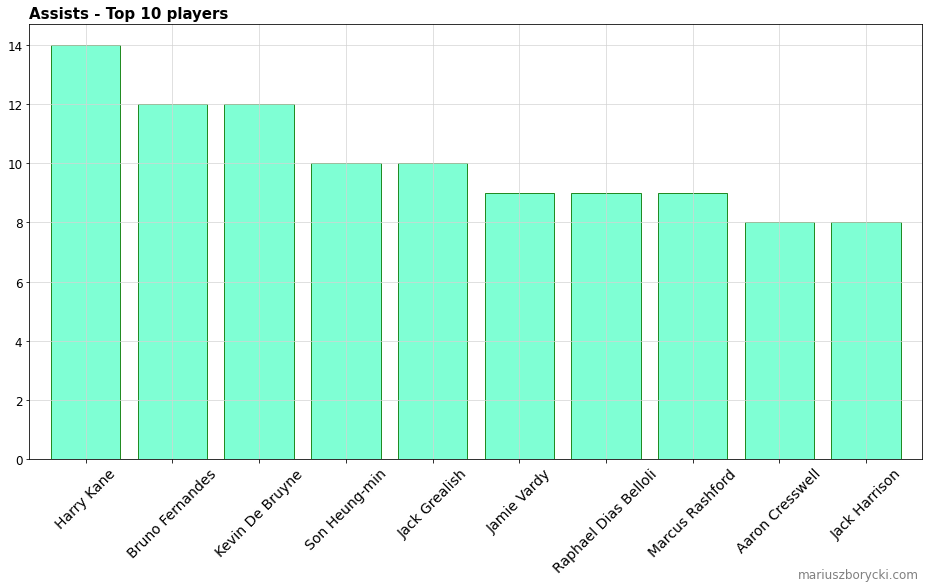

In [224]:
df[['Name','Club','Assists']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Assists'],ascending=False).head(10).plot(x='Name', kind='bar', figsize=(16,8), width=0.8, color='aquamarine', edgecolor='forestgreen', grid=True)
plt.grid(color='lightgrey', linestyle='-', linewidth=0.7)

plt.title('Assists - Top 10 players',loc ='left', size=15, fontweight ='bold')

plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel(None)
plt.legend([], frameon=False)

plt.text(0.8, -0.15, 'mariuszborycki.com', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes, color='grey', fontsize=12)

plt.show()

In [27]:
df[['Name','Club','Assists']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Assists'],ascending=False).head(20).groupby('Club')['Name'].count().sort_values(ascending=False)

Club
Liverpool FC         4
Leeds United         3
Tottenham Hotspur    2
Manchester United    2
Manchester City      2
West Ham United      1
Southampton          1
Leicester City       1
Everton              1
Chelsea              1
Brighton             1
Aston Villa          1
Name: Name, dtype: int64

Who were the players with most attempted passes

In [28]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

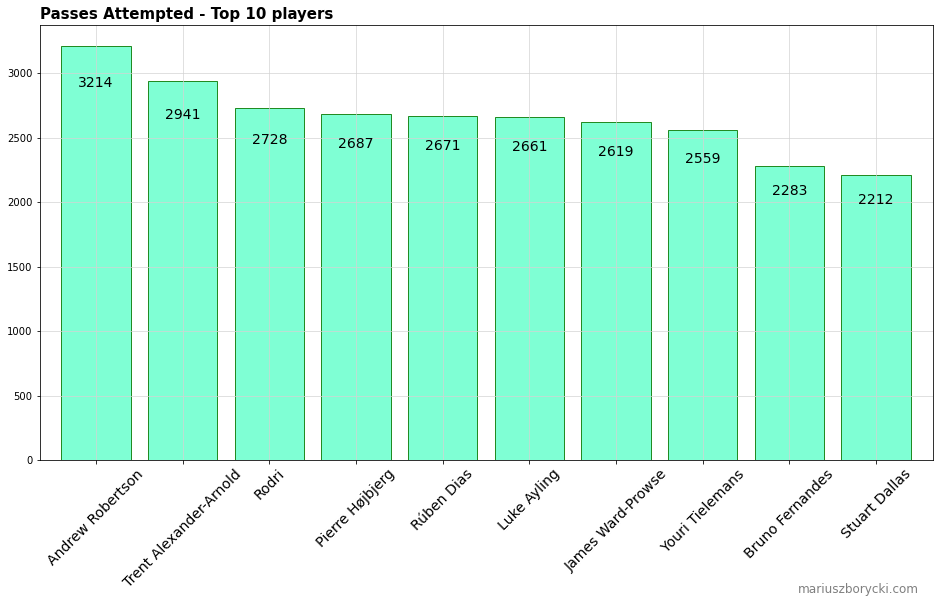

In [226]:
df[['Name','Club','Passes_Attempted']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Passes_Attempted'],ascending=False).head(10).plot(x='Name', kind='bar', figsize=(16,8), width=0.8, color='aquamarine', edgecolor='forestgreen', grid=True)

passes = df[['Name','Club','Passes_Attempted']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Passes_Attempted'],ascending=False).head(10)['Passes_Attempted'].to_list()
for index, data in enumerate(passes):
    plt.text(x=index, y=data * 0.9, s=f"{data}", fontdict=dict(fontsize=14), horizontalalignment='center')

plt.grid(color='lightgrey', linestyle='-', linewidth=0.7)
plt.xlabel(None)
plt.xticks(rotation=45, size=14)
plt.title('Passes Attempted - Top 10 players', loc ='left', size=15, fontweight ='bold')

plt.legend([], frameon=False)

plt.text(0.8, -0.15, 'mariuszborycki.com', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes, color='grey', fontsize=12)

plt.show()

Which players had the most accurate passes

In [30]:
df[['Name','Club','Passes_Attempted','Perc_Passes_Completed']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Perc_Passes_Completed'],ascending=False).head(10)

,Name,Club,Passes_Attempted,Perc_Passes_Completed
141,Elliot Anderson,Newcastle United,1,100.0
431,Robert Snodgrass,West Ham United,3,100.0
370,Nathan Broadhead,Everton,2,100.0
195,Iliman Ndiaye,Sheffield United,3,100.0
385,Odion Ighalo,Manchester United,1,100.0
484,Theo Corbeanu,Wolverhampton Wanderers,3,100.0
485,Theo Walcott,Everton,1,100.0
184,Hannibal Mejbri,Manchester United,3,100.0
328,Martin Kelly,Crystal Palace,2,100.0
510,Wes Morgan,Leicester City,5,100.0


In [31]:
df.loc[df.Passes_Attempted>1000,['Name','Club','Passes_Attempted','Perc_Passes_Completed']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Perc_Passes_Completed'],ascending=False).head(10)

,Name,Club,Passes_Attempted,Perc_Passes_Completed
74,John Stones,Manchester City,1713,94.3
135,Rúben Dias,Manchester City,2671,93.6
146,Thiago Silva,Chelsea,1871,93.5
109,Mohamed Elneny,Arsenal,1003,93.4
51,Georginio Wijnaldum,Liverpool FC,1747,93.3
11,Andreas Christensen,Chelsea,1089,92.8
16,Aymeric Laporte,Manchester City,1261,92.0
88,Kurt Zouma,Chelsea,1720,91.9
132,Rodri,Manchester City,2728,91.5
155,Victor Lindelöf,Manchester United,1800,91.1


In [32]:
df.loc[df.Passes_Attempted>1000,['Name','Club','Perc_Passes_Completed']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Perc_Passes_Completed'],ascending=False).head(30)

,Name,Club,Perc_Passes_Completed
74,John Stones,Manchester City,94.3
135,Rúben Dias,Manchester City,93.6
146,Thiago Silva,Chelsea,93.5
109,Mohamed Elneny,Arsenal,93.4
51,Georginio Wijnaldum,Liverpool FC,93.3
11,Andreas Christensen,Chelsea,92.8
16,Aymeric Laporte,Manchester City,92.0
88,Kurt Zouma,Chelsea,91.9
132,Rodri,Manchester City,91.5
155,Victor Lindelöf,Manchester United,91.1


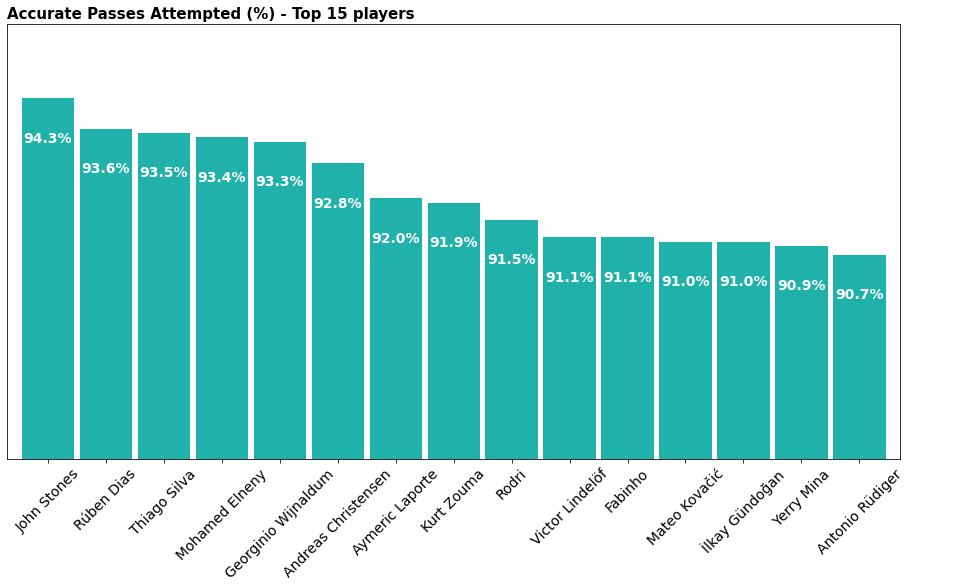

In [289]:
df.loc[df.Passes_Attempted>1000,['Name','Club','Perc_Passes_Completed']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Perc_Passes_Completed'],ascending=False).head(15).plot(x='Name', kind='bar', figsize=(16,8), color='lightseagreen', grid=False, width=0.90)

# plt.grid(color='lightgrey', linestyle='-', linewidth=0.7)
plt.title('Accurate Passes Attempted (%) - Top 15 players', loc ='left', size=15, fontweight ='bold')

passes_accur = df.loc[df.Passes_Attempted>1000,['Name','Club','Perc_Passes_Completed']].groupby(['Name','Club']).sum().reset_index().sort_values(by=['Perc_Passes_Completed'],ascending=False).head(15)['Perc_Passes_Completed'].tolist()
for index, data in enumerate(passes_accur):
    plt.text(x=index, y=data -1, s=f"{data}%", fontdict=dict(fontsize=14), horizontalalignment='center', color='w',fontweight ='bold')

plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
plt.xlabel(None)
plt.ylim(86, 96)
plt.tick_params(left = False, right = False, labelleft = False, labelbottom = True, bottom = True)

plt.legend([], frameon=False)

plt.text(1,-0.15, 'mariuszborycki.com', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes, color='grey', fontsize=12)

plt.show()

**Top 10 goal scorers: all players and players by position**

In [34]:
df[['Name','Club','Position','Goals']].groupby(['Name','Club','Position']).sum().reset_index().sort_values(by=['Goals'],ascending=False).head(10)

,Name,Club,Position,Goals
186,Harry Kane,Tottenham Hotspur,Forward,23
359,Mohamed Salah,Liverpool FC,Forward,22
71,Bruno Fernandes,Manchester United,Midfielder,18
403,Patrick Bamford,Leeds United,Forward,17
471,Son Heung-min,Tottenham Hotspur,Forward,17
131,Dominic Calvert-Lewin,Everton,Forward,16
226,Jamie Vardy,Leicester City,Forward,15
393,Ollie Watkins,Aston Villa,Forward,14
530,İlkay Gündoğan,Manchester City,Midfielder,13
21,Alexandre Lacazette,Arsenal,Forward,13


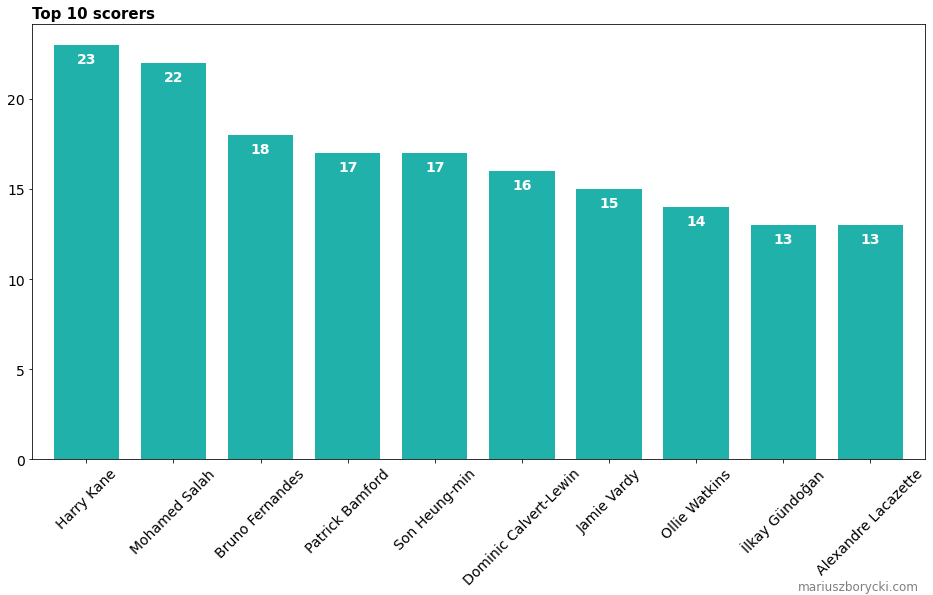

In [286]:
df[['Name','Club','Position','Goals']].groupby(['Name','Club','Position']).sum().reset_index().sort_values(by=['Goals'],ascending=False).head(10).plot(x='Name', kind='bar', figsize=(16,8), color='lightseagreen', grid=False, width=0.75)

# plt.grid(color='lightgrey', linestyle='-', linewidth=0.7)
plt.title('Top 10 scorers', loc ='left', size=15, fontweight ='bold')

goals = df[['Name','Club','Position','Goals']].groupby(['Name','Club','Position']).sum().reset_index().sort_values(by=['Goals'],ascending=False).head(10)['Goals'].tolist()
for index, data in enumerate(goals):
    plt.text(x=index, y=data -1, s=f"{data}", fontdict=dict(fontsize=14), horizontalalignment='center', color='w', fontweight ='bold')

plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
plt.xlabel(None)

plt.legend([], frameon=False)

plt.text(0.8, -0.15, 'mariuszborycki.com', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes, color='grey', fontsize=12)

plt.show()

In [35]:
df[['Position','Goals']].groupby(['Position']).sum().sort_values(by=['Goals'],ascending=False).head(10)

,Goals
Position,
Forward,574
Midfielder,268
Defender,143
Goalkeeper,1


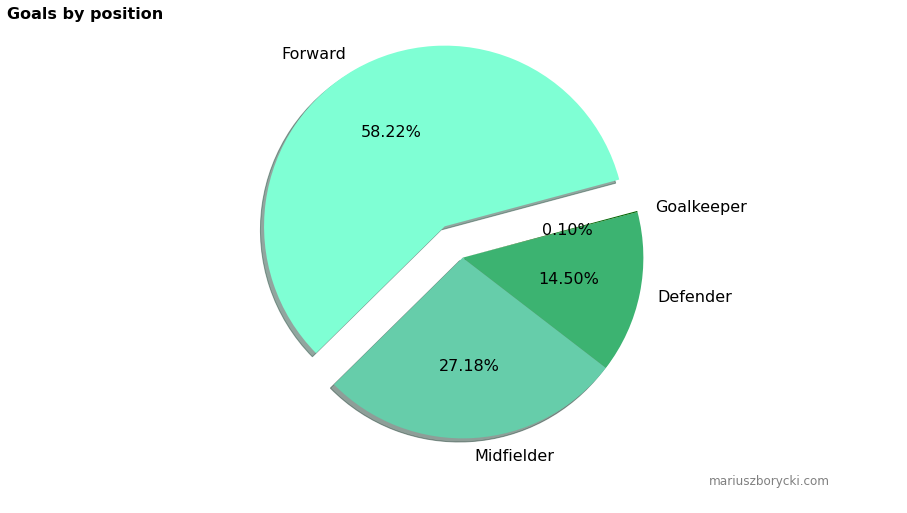

In [231]:
# variables
my_labels = df[['Position','Goals']].groupby(['Position']).sum().sort_values(by=['Goals'],ascending=False)\
        .head(10).index.tolist()
my_colors = ['aquamarine','mediumaquamarine','mediumseagreen','darkgreen']
myexplode = [0.2, 0, 0, 0]

# plot
df[['Position','Goals']].groupby(['Position']).sum().sort_values(by=['Goals'],ascending=False).head(10)\
        .plot(x='Name',kind='pie', figsize=(16,8), subplots=True, labels=my_labels,startangle=15, 
        shadow=True, colors=my_colors, explode=myexplode, autopct='%1.2f%%', fontsize=16)

plt.title('Goals by position', loc ='left', size=16, fontweight ='bold')
plt.ylabel(None)
plt.axis('equal')

plt.legend([],frameon=False)

plt.text(0.7, -0.1, 'mariuszborycki.com', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes, color='grey', fontsize=12)

plt.show()

**Top 10 assists: all players and players by position**

In [37]:
df[['Name','Club','Position','Assists']].groupby(['Name','Club','Position']).sum().reset_index().sort_values(by=['Assists'],ascending=False).head(10)

,Name,Club,Position,Assists
186,Harry Kane,Tottenham Hotspur,Forward,14
71,Bruno Fernandes,Manchester United,Midfielder,12
290,Kevin De Bruyne,Manchester City,Midfielder,12
471,Son Heung-min,Tottenham Hotspur,Forward,10
203,Jack Grealish,Aston Villa,Forward,10
226,Jamie Vardy,Leicester City,Forward,9
416,Raphael Dias Belloli,Leeds United,Midfielder,9
323,Marcus Rashford,Manchester United,Forward,9
1,Aaron Cresswell,West Ham United,Defender,8
204,Jack Harrison,Leeds United,Midfielder,8


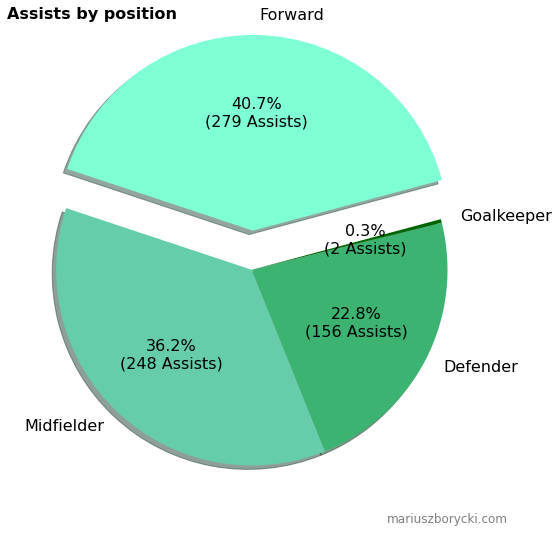

In [237]:
import numpy as np 

df_assists = df[['Position','Assists']].groupby(['Position']).sum().sort_values(by=['Assists'], ascending=False)
my_colors = ['aquamarine','mediumaquamarine','mediumseagreen','darkgreen']
myexplode = [0.2, 0, 0, 0]

fig, ax = plt.subplots(figsize=(16, 9))

assists = df_assists.Assists.tolist()
possition = df_assists.index.tolist()

def func(xx, yy):
    absolute = int(round(xx/100.*np.sum(yy)))
    return "{:.1f}%\n({:d} Assists)".format(xx, absolute)

ax.pie(assists, autopct=lambda x: func(x, assists), 
       textprops={'color':"black",'size':16}, # 'fontweight':'bold' 
       labels=possition, startangle=15, shadow=True, colors=my_colors, explode=myexplode)


ax.set_title("Assists by position", loc ='left', size=16, fontweight ='bold')

plt.text(0.9, -0.01, 'mariuszborycki.com', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes, color='grey', fontsize=12)

plt.show()

**Top 10 Players due to Ages**

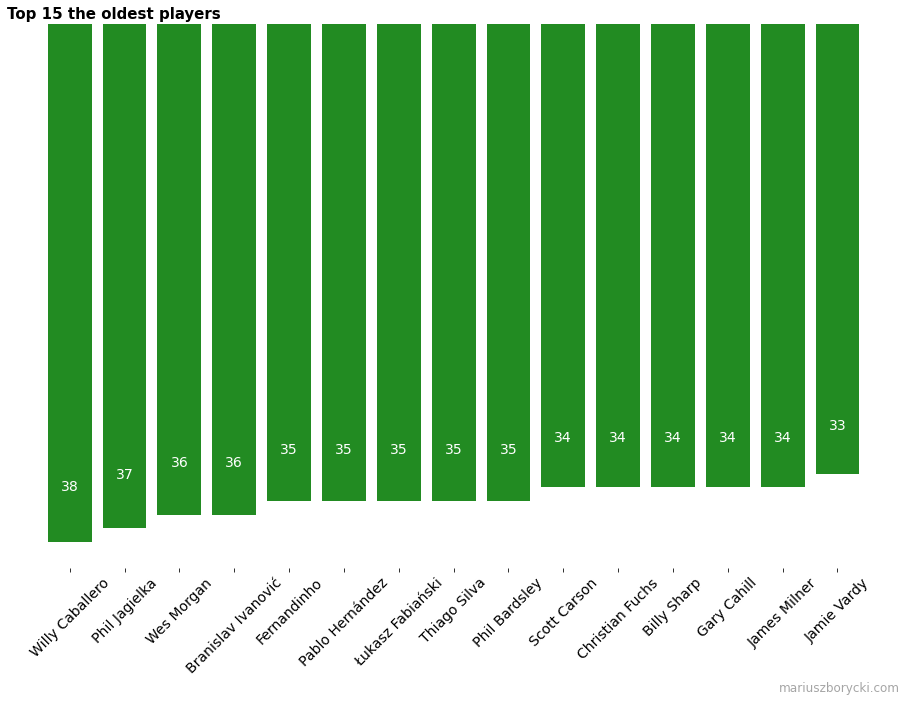

In [88]:
df_age_high = df[['Name','Club','Position','Age']].sort_values(by=['Age'], ascending=False).head(15)

name = df_age_high['Name']
age = df_age_high['Age']

fig, ax = plt.subplots(figsize=(16,10))
ax.bar(name,age,color='forestgreen')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
for index, data in enumerate(age):
    plt.text(x=index, y=data * 0.9, s=f"{data}", fontdict=dict(fontsize=14), horizontalalignment='center', color='w')

ax.set_title('Top 15 the oldest players',
             loc ='left', size=15, fontweight ='bold' )
 
fig.text(0.9, -0.05, 'mariuszborycki.com', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.tick_params(left = False, right = False, labelleft = False, labelbottom = True, bottom = True)

ax.invert_yaxis()
plt.yticks(fontsize=12)
plt.xticks(fontsize=14, rotation=45)
plt.show()

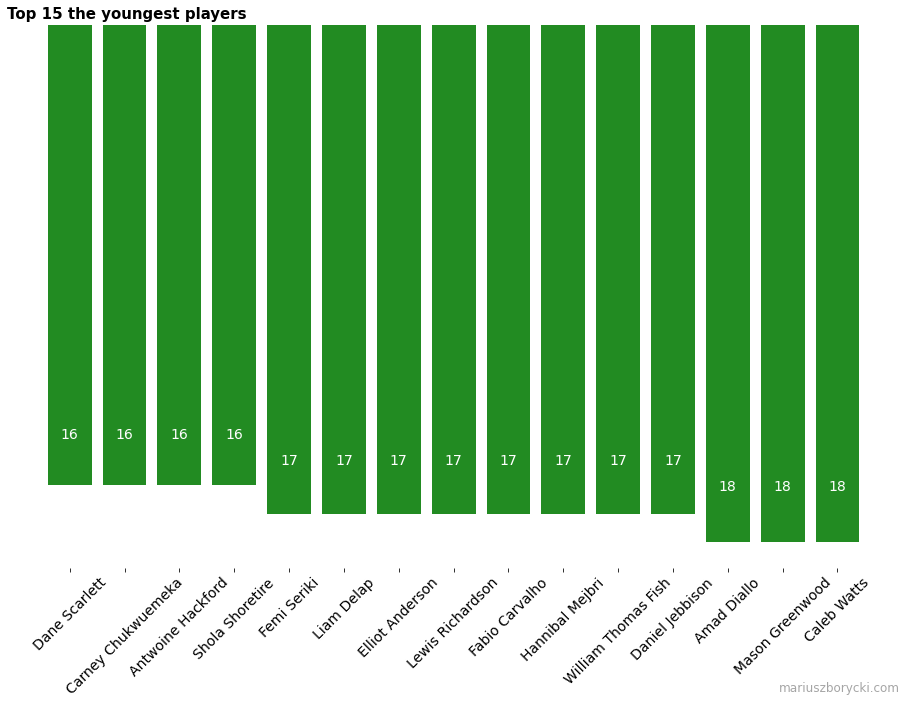

In [89]:
df_age_low = df[['Name','Club','Position','Age']].sort_values(by=['Age'], ascending=True).head(15)

name = df_age_low['Name']
age = df_age_low['Age']

fig, ax = plt.subplots(figsize=(16,10))
ax.bar(name,age,color='forestgreen')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
for index, data in enumerate(age):
    plt.text(x=index, y=data * 0.9, s=f"{data}", fontdict=dict(fontsize=14), horizontalalignment='center', color='w')

ax.set_title('Top 15 the youngest players',
             loc ='left', size=15, fontweight ='bold' )
 
fig.text(0.9, -0.05, 'mariuszborycki.com', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.tick_params(left = False, right = False, labelleft = False, labelbottom = True, bottom = True)

ax.invert_yaxis()
plt.yticks(fontsize=12)
plt.xticks(fontsize=14, rotation=45)
plt.show()

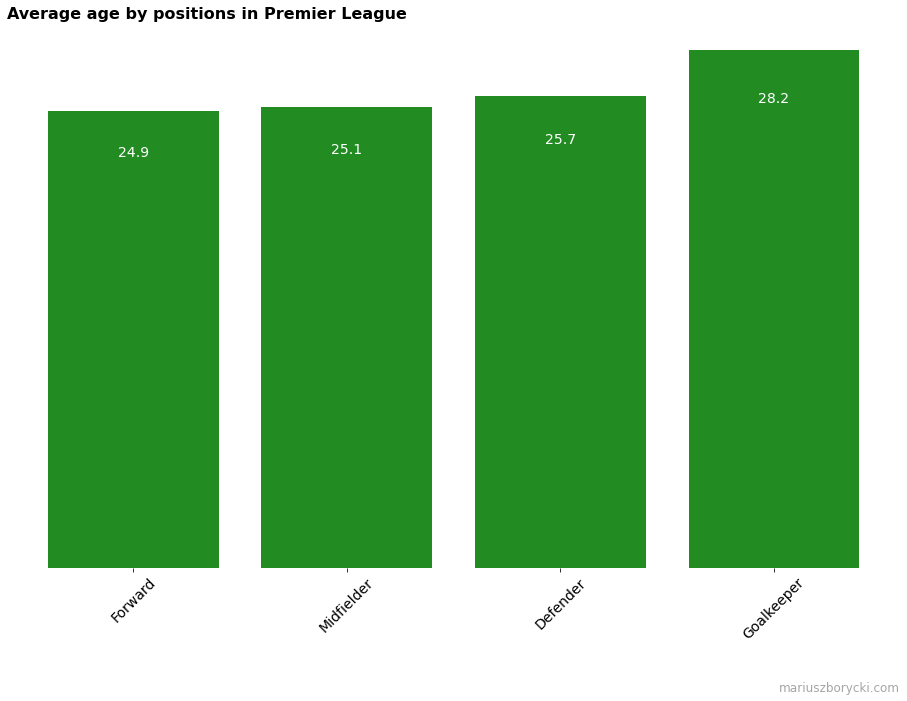

In [90]:
df_position = df[['Position','Age']].groupby(['Position']).mean().round(1).sort_values(by='Age')

fig, ax = plt.subplots(figsize=(16, 10))
age = df_position['Age']
position = df_position.index
ax.bar(position,age,color='forestgreen')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
for index, data in enumerate(age):
    plt.text(x=index, y=data * 0.9, s=f"{data}", fontdict=dict(fontsize=14), horizontalalignment='center', color='w')

ax.legend([], frameon=False)
ax.set_title("Average age by positions in Premier League", size=16, loc='left', fontweight='bold')

plt.tick_params(left = False, right = False, labelleft = False, labelbottom = True, bottom = True)
 
fig.text(0.9, -0.05, 'mariuszborycki.com', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.yticks(fontsize=12)
plt.xticks(fontsize=14, rotation=45)

plt.show()

**Show all teams with average age**

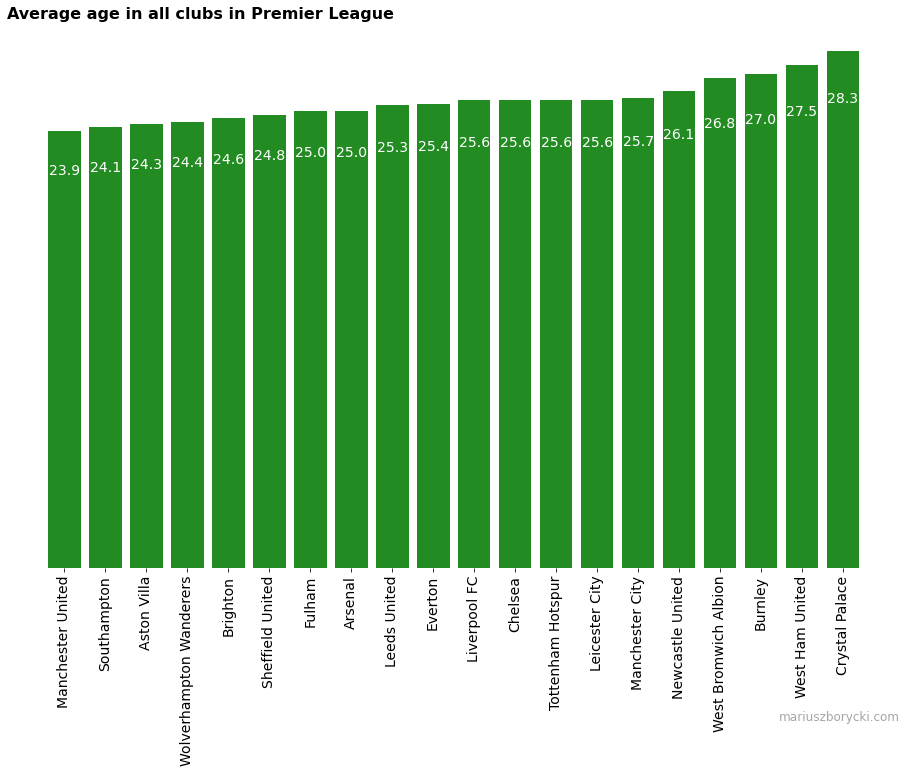

In [91]:
df_club_ages = df[['Club','Age']].groupby('Club').mean().round(1).sort_values(by=['Age'], ascending=True)


fig, ax = plt.subplots(figsize=(16, 10))
age = df_club_ages['Age']
club = df_club_ages.index
ax.bar(club,age,color='forestgreen')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
for index, data in enumerate(age):
    plt.text(x=index, y=data * 0.9, s=f"{data}", fontdict=dict(fontsize=14), horizontalalignment='center', color='w')

ax.legend([], frameon=False)
ax.set_title("Average age in all clubs in Premier League", size=16, loc='left', fontweight='bold')

plt.tick_params(left = False, right = False, labelleft = False, labelbottom = True, bottom = True)
 
fig.text(0.9, -0.09, 'mariuszborycki.com', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.yticks(fontsize=12)
plt.xticks(fontsize=14, rotation=90)

plt.show()

In [93]:
import seaborn as sns

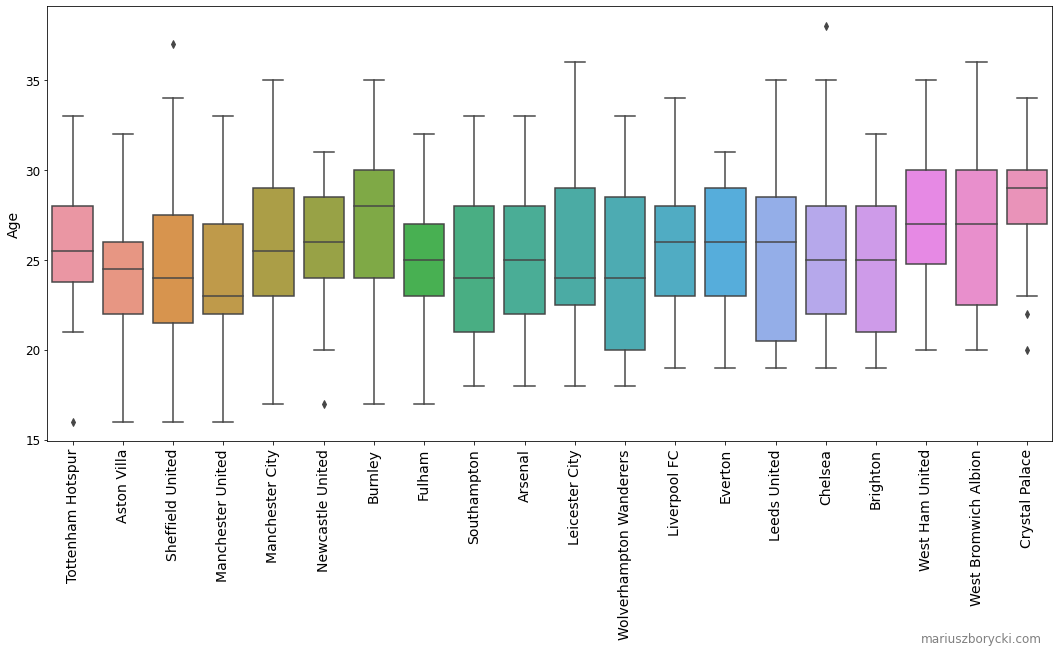

In [249]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Club',y='Age',data=df.sort_values(by='Age'))
plt.yticks(fontsize=12)
plt.xticks(fontsize=14, rotation=90)
plt.xlabel(None)
plt.ylabel('Age',size=14)


plt.text(1.3, -0.15, 'mariuszborycki.com', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes, color='grey', fontsize=12)

plt.show()

**Nationalities of the League**

In [112]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,Midfielder,21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,Goalkeeper,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,Forward,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,Defender,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,Defender,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [116]:
df.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

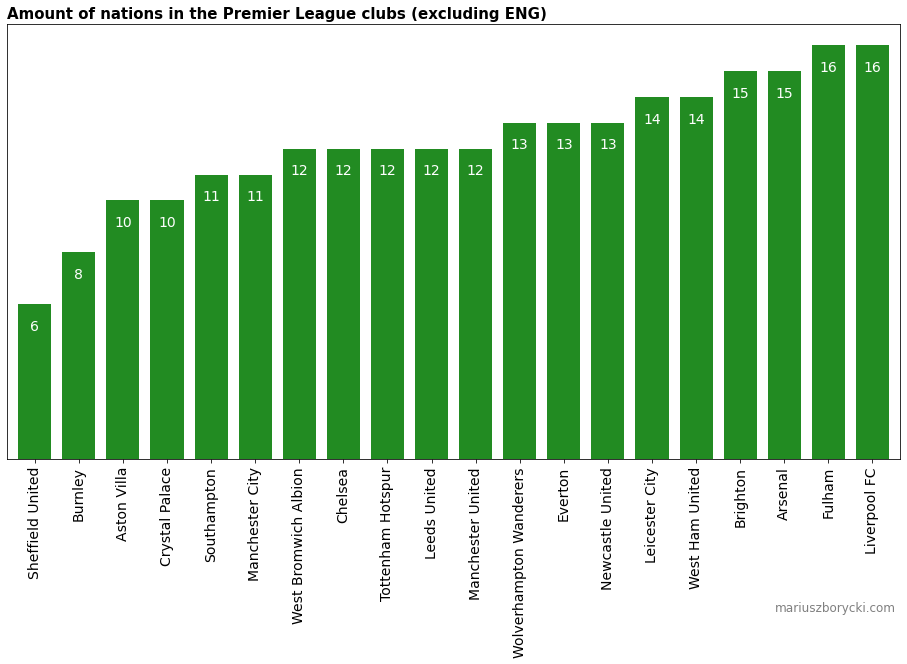

In [253]:
df.loc[df.Nationality!='ENG',['Club', 'Nationality']].drop_duplicates().groupby('Club').count().reset_index().sort_values(by='Nationality').plot(x='Club', kind='bar', figsize=(16,8), color='forestgreen', grid=False, width=0.75)


# plt.grid(color='lightgrey', linestyle='-', linewidth=0.7)
plt.title('Amount of nations in the Premier League clubs (excluding ENG)', loc ='left', size=15, fontweight ='bold')

nationalities = df.loc[df.Nationality!='ENG',['Club', 'Nationality']].drop_duplicates().groupby('Club').count().sort_values(by='Nationality')['Nationality'].tolist()
for index, data in enumerate(nationalities):
    plt.text(x=index, y=data -1, s=f"{data}", fontdict=dict(fontsize=14), horizontalalignment='center', color='w')

plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
plt.xlabel(None)
plt.tick_params(left = False, right = False, labelleft = False, labelbottom = True, bottom = True)

plt.legend([], frameon=False)


plt.text(1, -0.05, 'mariuszborycki.com', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes, color='grey', fontsize=12)

plt.show()

**Correlation Graph**

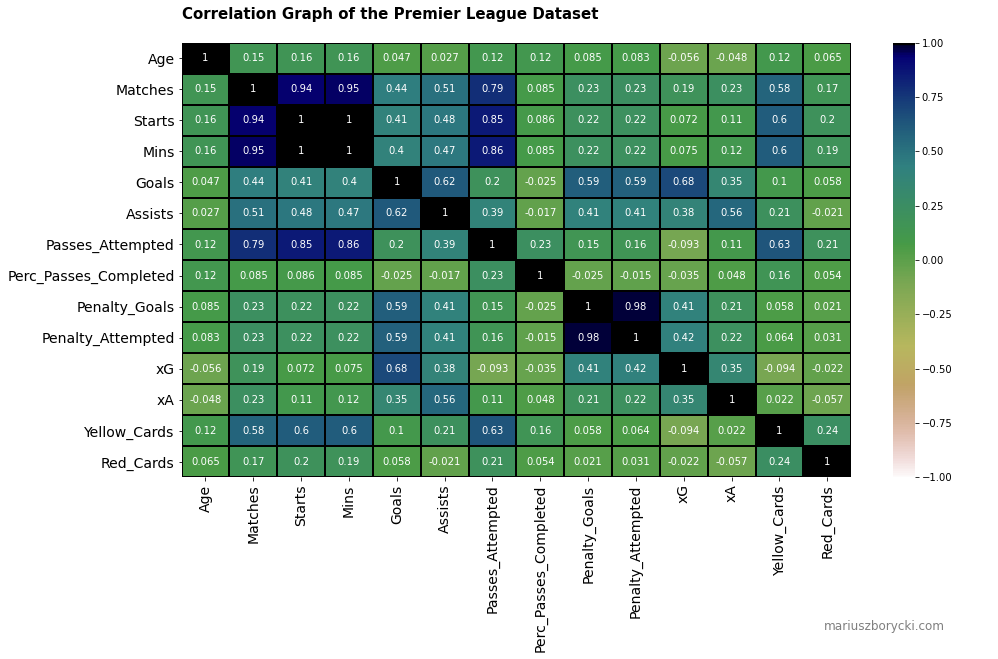

In [256]:
plt.figure(figsize=(15, 8))

correlation = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=1, linecolor='black', cmap='gist_earth_r') #,cmap='Pastel1' / , cmap='YlGnBu'

# sns.color_palette("husl", 9)
correlation.set_title('Correlation Graph of the Premier League Dataset\n', loc ='left', size=15, fontweight ='bold')

plt.xticks(rotation=90, size=14)
plt.yticks(size=14)

plt.text(1.1, -0.1, 'mariuszborycki.com', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes, color='grey', fontsize=12)

plt.show()